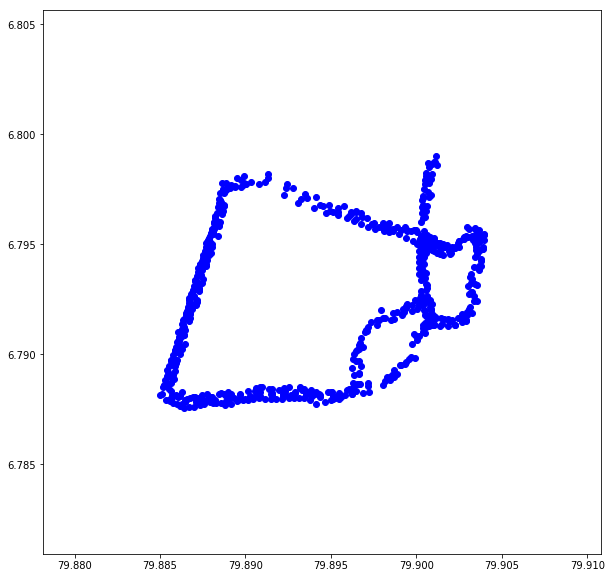

In [2]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle
import random

##############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
fig = plt.figure(figsize=(10, 10,))
df1 = pd.read_csv("/Users/dhanushka/Desktop/mydata/fypit/anaconda/data/routeall.csv")
plt.scatter(df1['longitude'], df1['latitude'], color='blue')
plt.show()


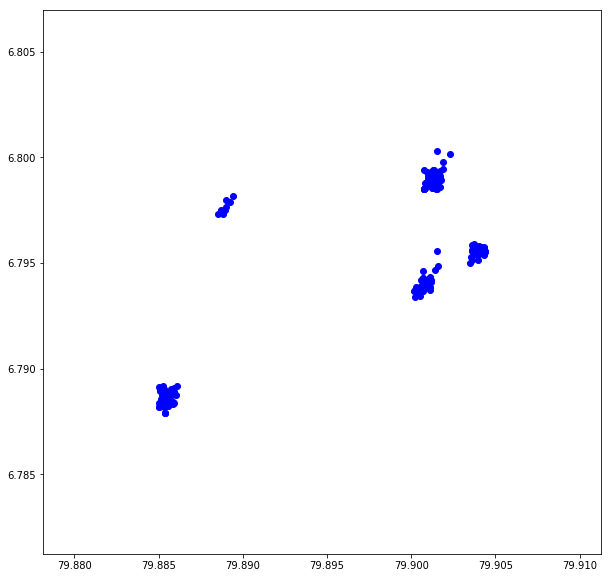

In [4]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

df3 = pd.read_csv("/Users/dhanushka/Desktop/mydata/fypit/anaconda/data/DESTI_FINAL.csv")
X=df3[["longitude", "latitude"]].to_numpy()

fig = plt.figure(figsize=(10, 10,))
plt.scatter(df3['longitude'], df3['latitude'], color='blue')

number of estimated clusters : 5


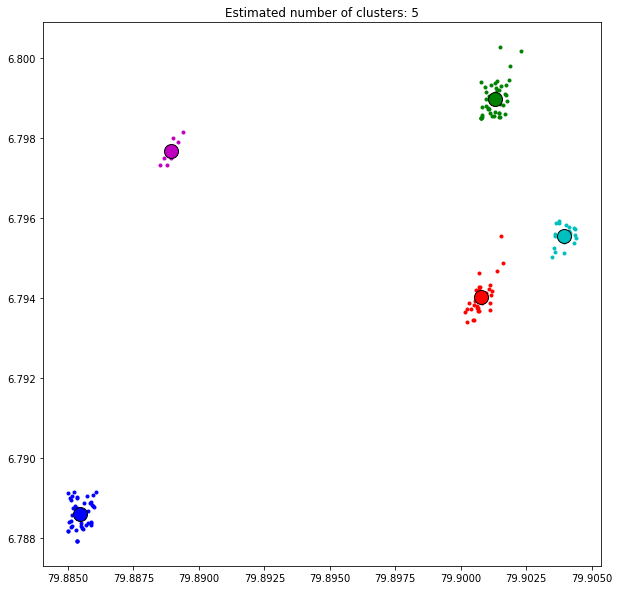

In [5]:


bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result

fig = plt.figure(figsize=(10, 10,))
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()